This is where we plot our experimental results.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
# Insert the path to the metrics data
control_var = 10
path_to_data = f"pfl/experimental_results/mnist_dp/mnist-dp-server_round_{control_var}-lr_0_01"

In [47]:
# List of pandas DataFrames to hold the metrics
metrics_dfs = []

for i in range(1, 4):
    # metrics = pd.read_csv("pfl/experimental_results/mnist_dp/mnist-dp-eps_7.csv")
    metrics = pd.read_csv(f'{path_to_data} ({i}).csv')
    metrics = metrics.dropna(subset=['Central val | accuracy']) # A DataFrame
    metrics_dfs.append(metrics['Central val | accuracy'])       # Append DataFrame to the list

accuracy_df = pd.concat(metrics_dfs, axis=1)

In [48]:
mean_accuracy = accuracy_df.mean(axis=1)
epochs = range(len(mean_accuracy))

Text(0.5, 1.0, 'MNIST - eps = 10, lr = 0.01')

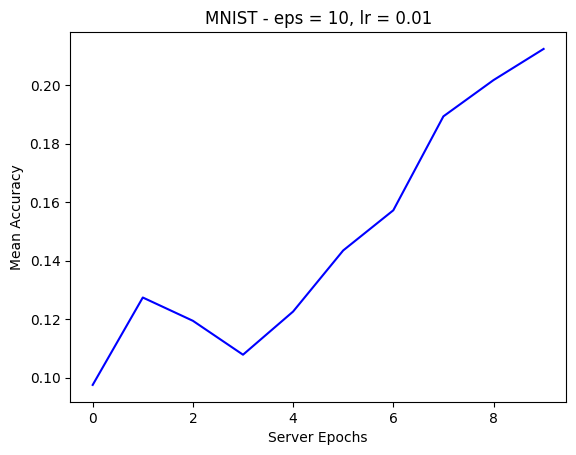

In [49]:
plt.plot(epochs, mean_accuracy, label='Mean Centralized Validation Accuracy', color='blue')
plt.xlabel('Server Epochs')
plt.ylabel('Mean Accuracy')
plt.title(f'MNIST - eps = {control_var}, lr = 0.01')

In [29]:
def extract_average(metric, path, count):
    metrics_dfs = []
    for i in range(1, count + 1):
        metrics = pd.read_csv(f'{path} ({i}).csv')
        metrics = metrics.dropna(subset=[metric])
        metrics_dfs.append(metrics[metric])
    return pd.concat(metrics_dfs, axis=1).mean(axis=1)  

# MNIST local epoch experiment

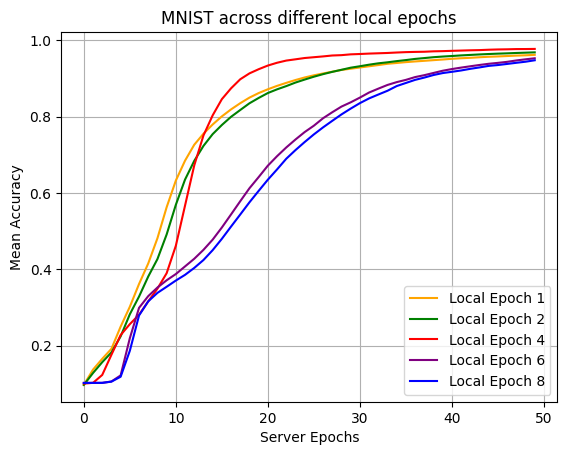

In [37]:
path = "pfl/experimental_results/mnist_no_dp/mnist-no_dp-local_epoch_"

mnist_local_epoch_1 = extract_average('Central val | accuracy', path + '1', 3)
mnist_local_epoch_2 = extract_average('Central val | accuracy', path + '2', 3)
mnist_local_epoch_4 = extract_average('Central val | accuracy', path + '4', 1)
mnist_local_epoch_6 = extract_average('Central val | accuracy', path + '6', 1)
mnist_local_epoch_8 = extract_average('Central val | accuracy', path + '8', 1)

assert len(mnist_local_epoch_1) == len(mnist_local_epoch_2) == len(mnist_local_epoch_4) == len(mnist_local_epoch_6) == len(mnist_local_epoch_8)

epochs = range(len(mnist_local_epoch_1))

plt.plot(epochs, mnist_local_epoch_1, label='Local Epoch 1', color='orange')
plt.plot(epochs, mnist_local_epoch_2, label='Local Epoch 2', color='green')
plt.plot(epochs, mnist_local_epoch_4, label='Local Epoch 4', color='red')
plt.plot(epochs, mnist_local_epoch_6, label='Local Epoch 6', color='purple')
plt.plot(epochs, mnist_local_epoch_8, label='Local Epoch 8', color='blue')
plt.xlabel('Server Epochs')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.title('MNIST across different local epochs')
plt.grid()

# MNIST DP server round experiment

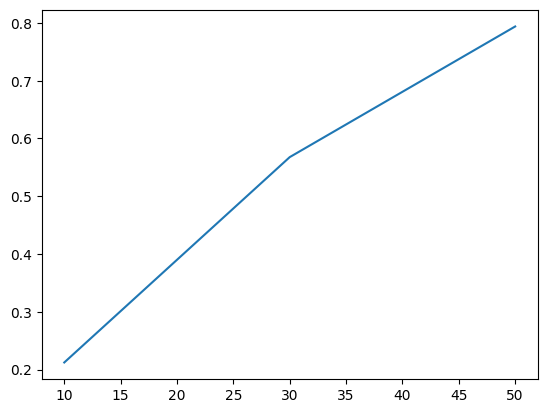

In [55]:
path_prefix = "pfl/experimental_results/mnist_dp/mnist-dp-server_round_"
path_suffix = "-lr_0_01"
mnist_server_round_10 = extract_average('Central val | accuracy', path_prefix + "10" + path_suffix, 3)[-1:]
mnist_server_round_30 = extract_average('Central val | accuracy', path_prefix + "30" + path_suffix, 3)[-1:]
mnist_server_round_50 = extract_average('Central val | accuracy', path_prefix + "50" + path_suffix, 3)[-1:]

server_epocs = [10, 30, 50]
accuracies = [mnist_server_round_10, mnist_server_round_30, mnist_server_round_50]
plt.plot(server_epocs, accuracies)

# Debugging code

Text(0.5, 1.0, 'Mean Centralized Validation Accuracy Over Server Epochs')

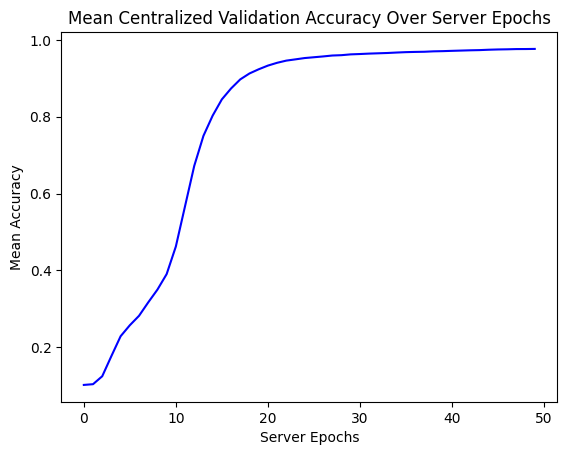

In [8]:
path_to_debug_data = "pfl/experimental_results/mnist_no_dp/mnist-optim_adam.csv"
metrics = pd.read_csv(path_to_debug_data)

accuracy = metrics['Central val | accuracy'].dropna()
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label='Mean Centralized Validation Accuracy', color='blue')
plt.xlabel('Server Epochs')
plt.ylabel('Mean Accuracy')
plt.title('Mean Centralized Validation Accuracy Over Server Epochs')